# Introduction to using stdpopsim

## Workshop Outline
1. Basics of using Jupyter Notebooks
2. Overview of stdpopsim
3. How to use the Python API
4. How to use the command line interface
5. Example analysis
6. How to ask for help
7. Some examples of what stdpopsim cannot currently do
8. Teaser of how to contribute
9. Using stdpopsim after the workshop  
10. How to Navigate the stdpopsim library catalog

----------
## 1. Basics of using Jupyter Notebooks

Jupyter Notebooks have cells where you can write in Markdown and run code.  
To execute a cell, click the run button or press shift enter.

In [1]:
print('Try writing some Python here')

Try writing some Python here


In [2]:
%%bash
echo 'We can also use Bash magic. Try writing some Bash here'

We can also use Bash magic. Try writing some Bash here


---------
## 2. Overview of stdpopsim

### What is stdpopsim?
- Library of previously published population genetic models that can be used to simulate data
- Includes simple & complex demographic models
- Models have undergone rigorous quality control to ensure what we implement matches the original publication

### Why is stdpopsim useful?
- Increase reproducibility in population genetics modeling
- Less work for simulating data to test new inference methods
- Facilitate comparisons among inference methods

### Phase 1
Adrion et al. (2020). _A community-maintained standard library of population genetic models_. eLife. https://doi.org/10.7554/eLife.54967

- Focused just on demographic modeling
- Used msprime as simulation engine
- Realistic genetic maps for each species

### Phase 2
Lauterbur et al. (2023) _Expanding the stdpopsim species catalog, and lessons learned for realistic genome simulations_ eLife. https://doi.org/10.7554/eLife.84874.1

- Expanded the catalog to 21 species!
- SLiM now fully functional as backend simulation engine
- Functions for modeling selection introduced

### Phase 3
New manuscript coming this year!

- Implemented models of selection in numerous genomes
- Published DFEs included
- Species-specific annotations (CDS, exons) included

### How to use stdpopsim
- Python API
  - more flexible
  - access to tskit functionality
  - faster for more replicates
- command line interface
  - one-liner
  - nice for people familiar with command line
  - easy to put into a bigger workflow

---------------
## 3. How to use the Python API

### Import the stdpopsim package

In [1]:
import stdpopsim

### Open the catalog page

Resources:
- [Catalog](https://stdpopsim.readthedocs.io/en/stable/catalog.html#)
- [Documentation](https://stdpopsim.readthedocs.io/en/stable/api.html)
- [Tutorials](https://stdpopsim.readthedocs.io/en/stable/tutorial.html#running-stdpopsim-with-the-python-interface-api)

### Which species?

Let's simulate humans.

_Use the [catalog](https://stdpopsim.readthedocs.io/en/stable/catalog.html#) to find available species_

https://stdpopsim.readthedocs.io/en/stable/api.html#stdpopsim.get_species

In [4]:
species = stdpopsim.get_species("HomSap")

### Which chromosome?

We'll simulate a region that is 10% of the length of chromosome 22.

Find what chromosomes are available in the [catalog](https://stdpopsim.readthedocs.io/en/stable/catalog.html#)

https://stdpopsim.readthedocs.io/en/stable/api.html#stdpopsim.Species.get_contig

In [5]:
contig = species.get_contig("chr22", length_multiplier=0.1)

Using a *real* genetic map: (cannot be used in conjunction with `length_multiplier`)

In [6]:
#contig = species.get_contig("chr22", genetic_map="HapMapII_GRCh38")

Using an alternative mutation or recombination rate:

In [7]:
# other_contig = stdpopsim.Contig(
#     mutation_rate=contig.mutation_rate*0.5,
#     recombination_map=contig.recombination_map
# ) 



### Which demographic model?
https://stdpopsim.readthedocs.io/en/stable/api.html#stdpopsim.DemographicModel

Use the [catalog](https://stdpopsim.readthedocs.io/en/stable/catalog.html#) to find available demographic models.
You can also see them in the `species` object you just created:

In [8]:
for model in species.demographic_models:
    print(model.id)

OutOfAfricaExtendedNeandertalAdmixturePulse_3I21
OutOfAfrica_3G09
OutOfAfrica_2T12
Africa_1T12
AmericanAdmixture_4B11
OutOfAfricaArchaicAdmixture_5R19
Zigzag_1S14
AncientEurasia_9K19
PapuansOutOfAfrica_10J19
AshkSub_7G19
OutOfAfrica_4J17
Africa_1B08
AncientEurope_4A21


Then set your demographic model.
https://stdpopsim.readthedocs.io/en/stable/api.html#stdpopsim.Species.get_demographic_model

In [9]:
model = species.get_demographic_model('OutOfAfrica_3G09')

You may want to verify that the simulated populations are correct.

In [10]:
print([pop.name for pop in model.populations])

['YRI', 'CEU', 'CHB']


### How many samples?

In [11]:
samples = {"YRI": 5, "CHB": 5, "CEU": 0}

### Which simulator?
https://stdpopsim.readthedocs.io/en/stable/api.html#simulation-engines

In [12]:
engine = stdpopsim.get_engine('msprime')

We're now ready to simulate:
https://stdpopsim.readthedocs.io/en/stable/api.html#stdpopsim.Engine.simulate

In [13]:
%%time
ts = engine.simulate(model, contig, samples, seed=1)

/Users/adk/github/stdpopsim/stdpopsim/engines.py:120: UserWarning: The demographic model has mutation rate 2.35e-08, but this simulation used the contig's mutation rate 1.29e-08. Diversity levels may be different than expected for this species. For details see documentation at https://popsim-consortium.github.io/stdpopsim-docs/stable/tutorial.html
  warnings.warn(


CPU times: user 544 ms, sys: 17.5 ms, total: 561 ms
Wall time: 599 ms


## Output
### to a tree sequence file

In [14]:
ts.dump("OutOfAfrica_3G09_API.ts")

### to a vcf file

In [15]:
with open("OutOfAfrica_3G09_API.vcf", "w") as vcf_file:
    ts.write_vcf(vcf_file, contig_id='22')

Let's take a look at our vcf:

In [16]:
%%bash
ls

Intro_stdpopsim.ipynb
Intro_stdpopsim_fillme.ipynb
OutOfAfrica_3G09_API.ts
OutOfAfrica_3G09_API.vcf
README.md
images


In [17]:
%%bash
head OutOfAfrica_3G09_API.vcf

##fileformat=VCFv4.2
##source=tskit 0.5.4
##FILTER=<ID=PASS,Description="All filters passed">
##contig=<ID=22,length=5081847>
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	tsk_0	tsk_1	tsk_2	tsk_3	tsk_4	tsk_5	tsk_6	tsk_7	tsk_8	tsk_9
22	329	0	C	G	.	PASS	.	GT	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0|0	0|0	0|0
22	591	1	C	G	.	PASS	.	GT	0|1	0|0	0|0	0|0	1|1	1|1	1|1	1|1	1|1	1|1
22	892	2	T	C	.	PASS	.	GT	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0
22	1322	3	C	G	.	PASS	.	GT	1|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0


### All together now!

In [18]:
import stdpopsim
species = stdpopsim.get_species("HomSap")
model = species.get_demographic_model('OutOfAfrica_3G09')
samples = {"YRI": 5, "CHB": 5, "CEU": 0}
engine = stdpopsim.get_engine('msprime')
contig = species.get_contig("chr22", length_multiplier=0.1)
ts = engine.simulate(model, contig, samples)
ts.dump("OutOfAfrica_3G09_API.trees")
with open("OutOfAfrica_3G09_API.vcf", "w") as vcf_file:
    ts.write_vcf(vcf_file, contig_id='22')

/Users/adk/github/stdpopsim/stdpopsim/engines.py:120: UserWarning: The demographic model has mutation rate 2.35e-08, but this simulation used the contig's mutation rate 1.29e-08. Diversity levels may be different than expected for this species. For details see documentation at https://popsim-consortium.github.io/stdpopsim-docs/stable/tutorial.html
  warnings.warn(


### _Try to simulate the Arabidopsis South Middle Atlas piecewise constant size model!_

In [19]:
species = stdpopsim.get_species("") #fill me!
model = species.get_demographic_model('') #fill me!
samples =  #fill me!
engine = stdpopsim.get_engine('msprime')
contig = species.get_contig("", length_multiplier=0.1) #fill me!
ts = engine.simulate(model, contig, samples)

SyntaxError: invalid syntax (2027073239.py, line 3)

### Questions?

---------------
## 4. How to use the command line interface
Resources:
- [Documentation](https://stdpopsim.readthedocs.io/en/stable/cli_arguments.html)
- [Tutorials](https://stdpopsim.readthedocs.io/en/stable/tutorial.html#running-stdpopsim-with-the-command-line-interface-cli)

### Run stdpopsim with the help option

In [20]:
%%bash
stdpopsim --help

usage: stdpopsim [-h] [-V] [-v | -q] [-c CACHE_DIR] [-e {msprime,slim}]
                 [--msprime-model {hudson,dtwf,smc,smc_prime}]
                 [--msprime-change-model T MODEL] [--slim-path PATH]
                 [--slim-script] [--slim-scaling-factor Q] [--slim-burn-in X]
                 {AedAeg,AnaPla,AnoCar,AnoGam,ApiMel,AraTha,BosTau,CaeEle,CanFam,ChlRei,DroMel,DroSec,EscCol,GasAcu,HelAnn,HelMel,HomSap,MusMus,PanTro,PapAnu,PonAbe,StrAga,download-genetic-maps}
                 ...

Command line interface for stdpopsim.

positional arguments:
  {AedAeg,AnaPla,AnoCar,AnoGam,ApiMel,AraTha,BosTau,CaeEle,CanFam,ChlRei,DroMel,DroSec,EscCol,GasAcu,HelAnn,HelMel,HomSap,MusMus,PanTro,PapAnu,PonAbe,StrAga,download-genetic-maps}
    AedAeg              Run simulations for Aedes aegypti.
    AnaPla              Run simulations for Anas platyrhynchos.
    AnoCar              Run simulations for Anolis carolinensis.
    AnoGam              Run simulations for Anopheles gambiae.
    ApiMe

`stdpopsim` uses a combination of [_positional arguments_](https://stdpopsim.readthedocs.io/en/stable/cli_arguments.html#Positional%20Arguments), which are required, and [_named arguments_](https://stdpopsim.readthedocs.io/en/stable/cli_arguments.html#Named%20Arguments), which are optional.

### Find your species and run stdpopsim with that species with the help option

In [21]:
%%bash
stdpopsim HomSap --help

usage: stdpopsim HomSap [-h] [--help-models [HELP_MODELS]] [-b BIBTEX_FILE]
                        [--help-genetic-maps [HELP_GENETIC_MAPS]] [-D] [-g]
                        [--help-dfes [HELP_DFES]] [-c] [-L LENGTH]
                        [-i INCLUSION_MASK] [-e EXCLUSION_MASK]
                        [-l LENGTH_MULTIPLIER] [--left LEFT] [--right RIGHT]
                        [-s SEED] [--keep-mutation-ids-as-alleles] [-d]
                        [--dfe] [--dfe-interval] [--dfe-bed-file]
                        [--help-annotations [HELP_ANNOTATIONS]]
                        [--dfe-annotation] [-o OUTPUT]
                        samples [samples ...]

Run simulations for Homo sapiens using up-to-date genome information,
genetic maps and simulation models from the literature. NOTE: By
default, the tskit '.trees' binary file is written to stdout,so you
should either redirect this to a file or use the '--output' option to
specify a filename.

Default population parameters for Homo sap

### Find your model and run stdpopsim with that model with the help option

In [18]:
%%bash
stdpopsim HomSap \
        --help-models


All simulation models for Homo sapiens

Africa_1B08: African-americans population
     African-American two-epoch instantaneous growth model from Boyko
    et al 2008, fit to the synonymous SFS for the 11 of 15 African
    Americans showing the least European ancestry, using coalescent
    simulations with recombination with the maximum likelihood method
    of Williamson et al 2005; times were calibrated assuming 3e5
    generations since human-chimp divergence and fitting the number of
    synonymous human-chimp differences. Mutation and recombination
    rates were assumed to be the same (1.8e-8).

    Populations:
        African_Americans: African-Americans from Boyko et al 2008

Africa_1T12: African population
     The model is a simplification of the two population Tennesen et
    al. model with the European-American population removed so that we
    are modeling the African population in isolation.

    Populations:
        AFR: African

AmericanAdmixture_4B11: American admixt

## Run a simulation
- pick the number of samples for each population
- pick a chromosome
- do you want a fraction of the chromosome?
- decide on an output file

Let's do a dry run first by using `-D`.

In [19]:
%%bash
stdpopsim HomSap 10 10 10 \
    --demographic-model OutOfAfrica_3G09 \
    --chromosome chr22 \
    --length-multiplier 0.1 \
    --output OutOfAfrica_3G09_CLI.ts \
    -D 

Simulation information:
    Engine: msprime (1.2.0)
    Model id: OutOfAfrica_3G09
    Model description: Three population out-of-Africa
    Population: number_samples (sampling_time_generations):
        YRI: 10 (0)
        CEU: 10 (0)
        CHB: 10 (0)
Contig Description:
    Contig origin: chr22:0-5081847
    Contig length: 5081847.0
    Contig ploidy: 2
    Mean recombination rate: 2.1057233894035443e-08
    Mean mutation rate: 2.35e-08
    Genetic map: None

If you use this simulation in published work, please cite:
[stdpopsim]
Adrion et al., 2020: https://doi.org/10.7554/eLife.54967
[simulation engine]
Kelleher et al., 2016: https://doi.org/10.1371/journal.pcbi.1004842
[generation time]
Tremblay and Vézina, 2000: https://doi.org/10.1086/302770
[population size]
Takahata, 1993: https://doi.org/10.1093/oxfordjournals.molbev.a039995
[genome assembly]
International Human Genome Sequencing Consortium, 2001: http://dx.doi.org/10.1038/35057062
[recombination rate]
The International Ha

Does that look right? If so, let's do the simulation!

In [20]:
%%bash
stdpopsim HomSap 10 10 10 \
         --demographic-model OutOfAfrica_3G09 \
         --chromosome chr22 \
         --length-multiplier 0.1 \
         --output OutOfAfrica_3G09_CLI.ts

Simulation information:
    Engine: msprime (1.2.0)
    Model id: OutOfAfrica_3G09
    Model description: Three population out-of-Africa
    Population: number_samples (sampling_time_generations):
        YRI: 10 (0)
        CEU: 10 (0)
        CHB: 10 (0)
Contig Description:
    Contig origin: chr22:0-5081847
    Contig length: 5081847.0
    Contig ploidy: 2
    Mean recombination rate: 2.1057233894035443e-08
    Mean mutation rate: 2.35e-08
    Genetic map: None

If you use this simulation in published work, please cite:
[stdpopsim]
Adrion et al., 2020: https://doi.org/10.7554/eLife.54967
[simulation engine]
Kelleher et al., 2016: https://doi.org/10.1371/journal.pcbi.1004842
[generation time]
Tremblay and Vézina, 2000: https://doi.org/10.1086/302770
[population size]
Takahata, 1993: https://doi.org/10.1093/oxfordjournals.molbev.a039995
[genome assembly]
International Human Genome Sequencing Consortium, 2001: http://dx.doi.org/10.1038/35057062
[recombination rate]
The International Ha

In [22]:
%%bash
tskit vcf OutOfAfrica_3G09_CLI.ts > OutOfAfrica_3G09_CLI.vcf

Let's take a look at our vcf.

In [23]:
%%bash
ls

Intro_stdpopsim.ipynb
Intro_stdpopsim_fillme.ipynb
OutOfAfrica_3G09_API.trees
OutOfAfrica_3G09_API.ts
OutOfAfrica_3G09_API.vcf
OutOfAfrica_3G09_CLI.ts
OutOfAfrica_3G09_CLI.vcf
README.md
images


In [24]:
%%bash
head OutOfAfrica_3G09_CLI.vcf

##fileformat=VCFv4.2
##source=tskit 0.5.4
##FILTER=<ID=PASS,Description="All filters passed">
##contig=<ID=1,length=5081847>
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	tsk_0	tsk_1	tsk_2	tsk_3	tsk_4	tsk_5	tsk_6	tsk_7	tsk_8	tsk_9	tsk_10	tsk_11	tsk_12	tsk_13	tsk_14	tsk_15	tsk_16	tsk_17	tsk_18	tsk_19	tsk_20	tsk_21	tsk_22	tsk_23	tsk_24	tsk_25	tsk_26	tsk_27	tsk_28	tsk_29
1	351	0	A	G	.	PASS	.	GT	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
1	3186	1	C	T	.	PASS	.	GT	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1
1	3654	2	G	C	.	PASS	.	GT	1	0	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1
1	3709	3	G	A	.	PASS	.	GT	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0


### _Try to simulate the Arabidopsis South Middle Atlas piecewise constant size model!_

Bonus: from the `--help` output, can you see how you might use one of the published genetic maps in this simulation? (perhaps the *SalomeAveraged_TAIR7* map?)

In [ ]:
%%bash
stdpopsim #fill me!

### Questions?

-------------
## 5. Example analysis
Let's suppose we wanted to check if a published model is a good approximation of our real data. To do this, we'll calculate a few population genetics statistics and see if the real data overlap our simulated data. (For this exercise we will assume some value for the stats from the real data).


### Our pretend real data
Let's say we have samples from three human populations, and they have a mean genetic diversity of: 0.00045, 0.00029, 0.00027.

In [9]:
piA = 0.00045
piB = 0.00029
piC = 0.00027

### Simulate a model to compare to real data and calculate stats

We'll simulate the human Three population out-of-Africa _n_ times.  

_Find this model in the catalog._  
_How many populations are there?_  
_How many samples do we want to simulate?_  
_What chromosome do we want to simulate?_  
_Do we want to reduce the chromosome size?_

#### Set up the simulation

In [3]:
import stdpopsim
species = stdpopsim.get_species("HomSap")
model = species.get_demographic_model('OutOfAfrica_3G09')
samples = {"YRI": 10, "CHB": 10, "CEU": 10}
engine = stdpopsim.get_engine('msprime')
contig = species.get_contig("chr22", length_multiplier=0.1)

#### Simulation and calculate the stats in a for loop

Make a list of sample chromosomes (nodes) from each population

In [4]:
def make_sample_list(ts):
    sample_list = []
    for pop in range(0, ts.num_populations):
        sample_list.append(ts.samples(pop).tolist())
    return sample_list

Run the simulations and calculate the summary statistics

In [5]:
%%time
from progressbar import ProgressBar #This is just to get a progress bar
pbar = ProgressBar() #This is just to get a progress bar

n = 50
pi_list = []
for i in pbar(range(n)):
    ts = engine.simulate(model, contig, samples)
    sample_list = make_sample_list(ts)
    pi_list.append(ts.diversity(sample_sets=sample_list))
print('Done simulating {} replicates!'.format(n))

/Users/adk/github/stdpopsim/stdpopsim/engines.py:120: UserWarning: The demographic model has mutation rate 2.35e-08, but this simulation used the contig's mutation rate 1.29e-08. Diversity levels may be different than expected for this species. For details see documentation at https://popsim-consortium.github.io/stdpopsim-docs/stable/tutorial.html
  warnings.warn(


Done simulating 50 replicates!
CPU times: user 32.4 s, sys: 733 ms, total: 33.1 s
Wall time: 33.7 s


### Plot stats from simulated and "real" data

Convert simulated stats to a dataframe (only dataframes are easy to work with), then lets look at the first couple of lines using `head()`

In [25]:
import pandas as pd
pi_df = pd.DataFrame(
    data=pi_list, columns=[pop.name for pop in model.populations])
pi_df.head()

,YRI,CEU,CHB
0,0.000445,0.000327,0.000296
1,0.000433,0.000301,0.000296
2,0.000451,0.000315,0.000313
3,0.000439,0.000290,0.000288
4,0.000446,0.000317,0.000309


In [26]:
pi_df_melted = pd.melt(pi_df, var_name='Pops', value_name='Pi')

## Plot data

(array([0.00025 , 0.000275, 0.0003  , 0.000325, 0.00035 , 0.000375,
        0.0004  , 0.000425, 0.00045 , 0.000475, 0.0005  ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

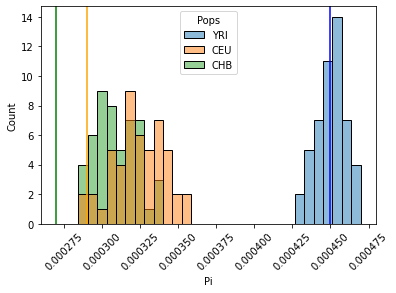

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.histplot(data=pi_df_melted, x="Pi", hue="Pops", bins=30)
ax.axvline(x=piA, color='blue')
ax.axvline(x=piB, color='orange')
ax.axvline(x=piC, color='green')
plt.xticks(rotation=45)

## A PCA example using scikit-allel
Quick look at using stdpopsim together with scikit-allel to examine PCA of genetic variation from simulations.

First we set the model:

In [11]:
import allel
import stdpopsim

species = stdpopsim.get_species("HomSap")
model = species.get_demographic_model('OutOfAfrica_3G09')
samples = {"YRI": 50, "CHB": 50, "CEU": 50}
engine = stdpopsim.get_engine('msprime')
contig = species.get_contig("chr22", length_multiplier=0.1)

next we will simulate and use tools from scikit-allel to go from tree sequences to genotypes. we'll output the first few rows of the genotype array produced by allel

In [30]:
ts = engine.simulate(model, contig, samples)
haps = allel.HaplotypeArray(ts.genotype_matrix())
gns = haps.to_genotypes(ploidy=2)
gns

/Users/adk/github/stdpopsim/stdpopsim/engines.py:120: UserWarning: The demographic model has mutation rate 2.35e-08, but this simulation used the contig's mutation rate 1.29e-08. Diversity levels may be different than expected for this species. For details see documentation at https://popsim-consortium.github.io/stdpopsim-docs/stable/tutorial.html
  warnings.warn(


TypeError: Cannot convert to a rectangular array.

now we're ready to do PCA. we'll do the decomposition and then plot, note that allel requires a flattened version of the genotype array above that codes individual genotypes as 0/1/2 according to the number of reference alleles

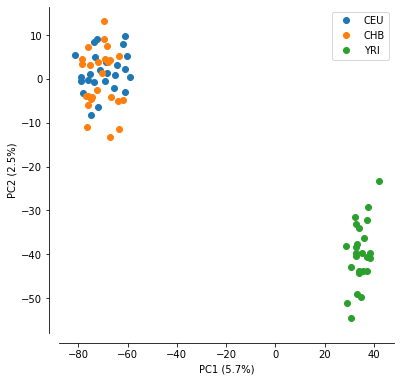

In [31]:

def plot_pca_coords(coords, fitted, pc1, pc2, ax):
    x = coords[:, pc1]
    y = coords[:, pc2]
    ax.plot(x[0:25], y[0:25], marker='o', linestyle=' ', label='CEU', markersize=6)
    ax.plot(x[25:50], y[25:50], marker='o', linestyle=' ', label='CHB', markersize=6)
    ax.plot(x[50:75], y[50:75], marker='o', linestyle=' ', label='YRI', markersize=6)

    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, fitted.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, fitted.explained_variance_ratio_[pc2]*100))


fig, ax = plt.subplots(figsize=(6, 6))
sns.despine(ax=ax, offset=10)

coords, fitted = allel.pca(gns.to_n_ref())
plot_pca_coords(coords, fitted, 0, 1, ax)
ax.legend()



### Questions?

---------
## 6. How to ask for help
- Have you read the [documentation](https://stdpopsim.readthedocs.io/en/stable/index.html)?
- Search open and closed [GitHub issues](https://github.com/popsim-consortium/stdpopsim/issues?q=is%3Aissue)
- Write a new [GitHub issue](https://github.com/popsim-consortium/stdpopsim/issues/new/choose)
- Join the PopSim Slack workspace and post in the #newbie-help channel ([invite link here](https://join.slack.com/t/popsimgroup/shared_invite/zt-1ql1axuk6-ymqHmu9NQJ1PqfZKFC6SzQ))

---------
## 7. Some examples of what stdpopsim cannot currently do
- simulate species or demographic models that are not in the catalog 
    - if you want to do this, if it is a published model - submit it to stdpopsim, if it is not a published model, use a simulator (e.g. msprime, slim)
- simulate parameter values not from the published model (including priors)
- simulate selection (in the works!)
- simulate missing data and errors (on the horizon!)


----------
## 8. Teaser of [how to contribute](https://stdpopsim.readthedocs.io/en/stable/development.html#)

- Write [GitHub issues](https://github.com/popsim-consortium/stdpopsim/issues/new/choose)!
- [Add new species](https://stdpopsim.readthedocs.io/en/stable/development.html#adding-a-new-species)
- [Add new demographic models](https://stdpopsim.readthedocs.io/en/stable/development.html#adding-a-new-demographic-model)
- Help with Documentation and tutorials

-----------
## 9. Using stdpopsim on your own after the workshop
- Play in a Jupyter Notebook Binder
  - Using this one [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/popsim-consortium/workshops.git/main?filepath=intro_stdpopsim%2FIntro_stdpopsim.ipynb)
  - In the Binder associated with the [stdpopsim GitHub repository](https://github.com/popsim-consortium/stdpopsim) [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/popsim-consortium/stdpopsim/master?filepath=stdpopsim_example.ipynb)
- Install stdpopsim locally following the [instructions in the documentation](https://stdpopsim.readthedocs.io/en/stable/installation.html)
- Consult the [stdpopsim documentation](https://stdpopsim.readthedocs.io/en/stable/installation.html)

---------
## 10. How to Navigate the [stdpopsim library catalog](https://stdpopsim.readthedocs.io/en/stable/catalog.html)

### The Catalog is organized first by species.

_How many species are there?_

![](images/catalog.png)


### Each species has a set of defining attributes. 

_What are the attributes?_

![](images/species_attributes.png)

### Each species has defined genome parameters.

_What are the genome parameters?_

![](images/genome_params.png)

### Some species have a genetic map.

Genetic maps are stored on AWS and downloaded to cache when used.

![](images/genetic_maps.png)

### Some species have demographic models.

All models are from published models.

_What models are available? Are there any you recognize from the literature?_

![](images/models.png)

### Each model has a description and set of defining attributes. 

_What are the attributes?_

![](images/model_attr.png)

### Each model has a table of defined model parameters from the publication. 

_Can you find where in the original publication the model parameters are given?_

![](images/model_params.png)